In [ ]:
import pandas as pd
# Load the new CSV file
file_path_2 = 'HX711_Stats4.csv'
data_2 = pd.read_csv(file_path_2)

# Display the first few rows of the new data
data_2.head()


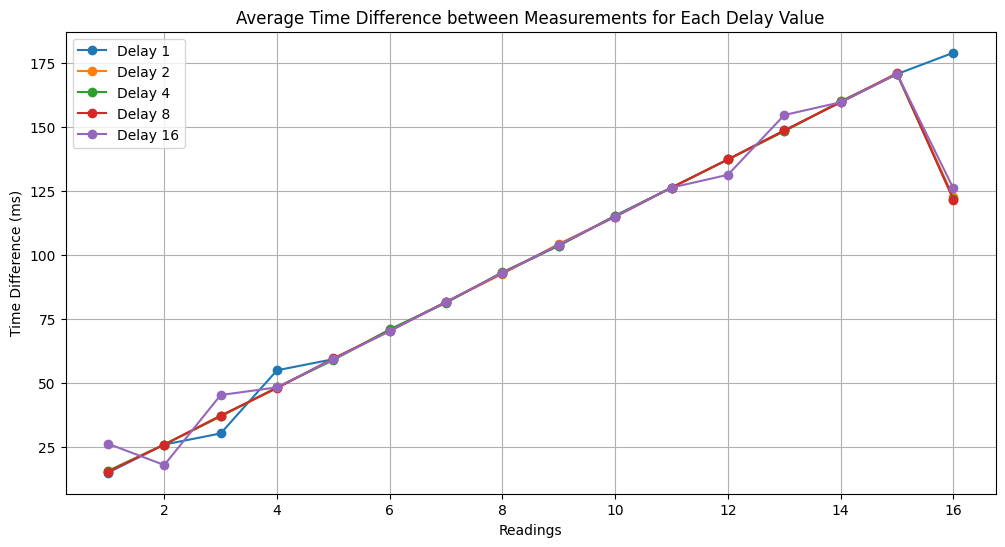

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Strip whitespace from column names
data_2.columns = data_2.columns.str.strip()

# Convert Time to datetime format
data_2['Time'] = pd.to_datetime(data_2['Time'], format='%H:%M:%S:%f')

# Calculate time difference in milliseconds
data_2['Time_diff'] = data_2['Time'].diff().dt.total_seconds() * 1000

# Drop rows with NaN values in Delay or Readings
data_2 = data_2.dropna(subset=['Delay', 'Readings', 'Time_diff'])

# Group by Delay and Readings, then calculate the mean of Time_diff
data_2_avg = data_2.groupby(['Delay', 'Readings']).agg({'Time_diff': 'mean'}).reset_index()

subDelay = np.array([1, 2, 4, 8, 16])

# Get the unique delays that are in subDelay
unique_delays = data_2_avg['Delay'].unique()
filtered_delays = unique_delays[np.isin(unique_delays, subDelay)]

# Plot the data
plt.figure(figsize=(12, 6))
for delay in filtered_delays:
    subset = data_2_avg[data_2_avg['Delay'] == delay]
    plt.plot(subset['Readings'], subset['Time_diff'], label=f'Delay {delay}',marker='o')

plt.xlabel('Readings')
plt.ylabel('Time Difference (ms)')
plt.title('Average Time Difference between Measurements for Each Delay Value')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
data_2_avg.to_csv('data_2_avg.csv', index=True)

In [22]:
print(data_2_avg['Time_diff'])


0       15.000000
1       26.000000
2       30.333333
3       55.000000
4       59.333333
          ...    
139    464.333333
140    467.666667
141    394.000000
142    408.333333
143    274.333333
Name: Time_diff, Length: 144, dtype: float64


In [23]:
# Create a pivot table
pivot_table = data_2_avg.pivot(index='Readings', columns='Delay')

# Drop the 'Time_diff' level from the column index
pivot_table.columns = pivot_table.columns.droplevel(0)

# Save the pivot table to a CSV file
pivot_table.to_csv('pivot_table.csv')

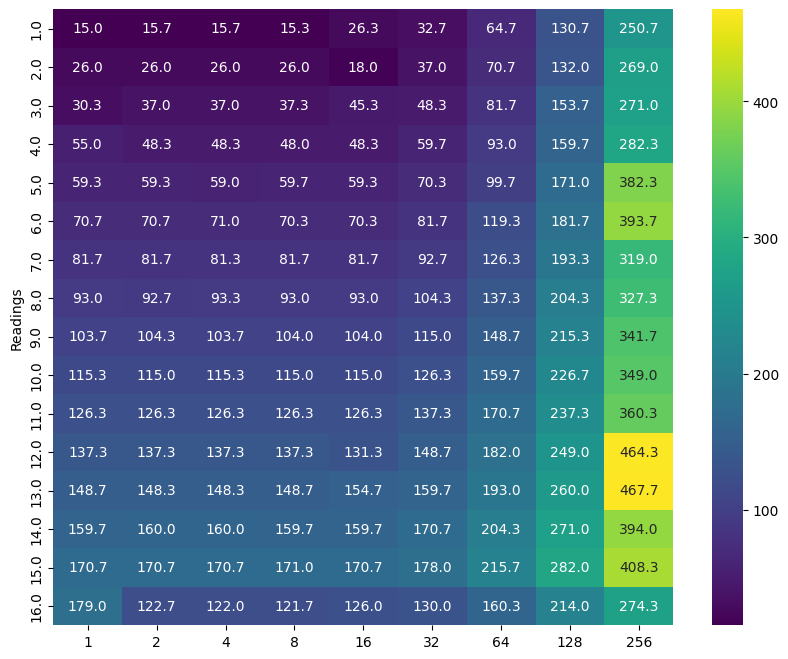

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the pivot table data from the CSV file
pivot_table = pd.read_csv('pivot_table.csv', index_col=0)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt=".1f")

# Show the plot
plt.show()


In [25]:
# Strip whitespace from Delay values
data_2['Delay'] = data_2['Delay'].str.strip().astype(int)

# Filter the data for Delay 1 again
data_delay_1 = data_2[data_2['Delay'] == 8]

# Group by Readings and calculate the mean of Measure
data_delay_1_avg = data_delay_1.groupby(['Readings']).agg({'Measure': 'mean'}).reset_index()

# Verify the data for Delay 1
data_delay_1_avg.head(), data_delay_1_avg.describe()


AttributeError: Can only use .str accessor with string values!

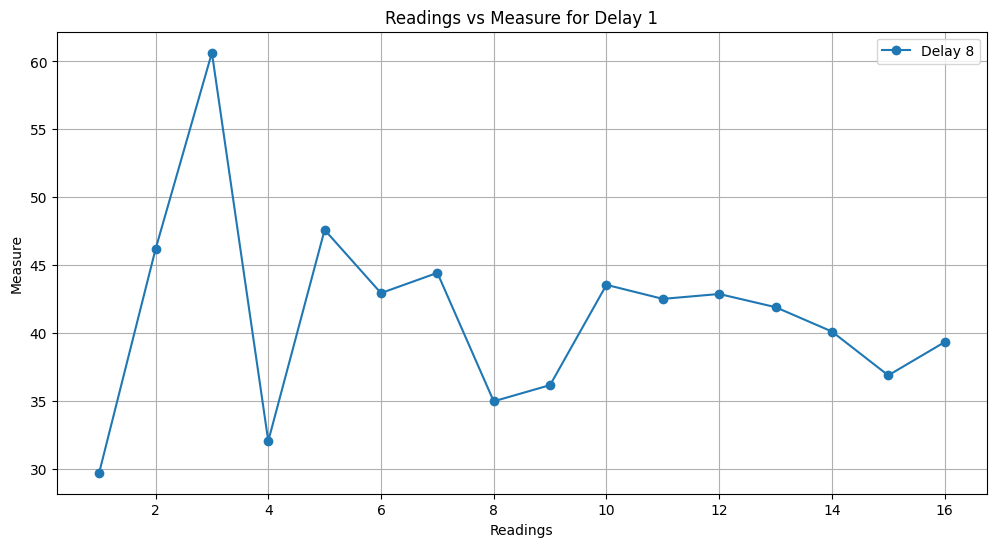

In [26]:
# Plot Readings vs Measure for Delay 1
plt.figure(figsize=(12, 6))
plt.plot(data_delay_1_avg['Readings'], data_delay_1_avg['Measure'], label='Delay 8', marker='o')

plt.xlabel('Readings')
plt.ylabel('Measure')
plt.title('Readings vs Measure for Delay 1')
plt.legend()
plt.grid(True)
plt.show()


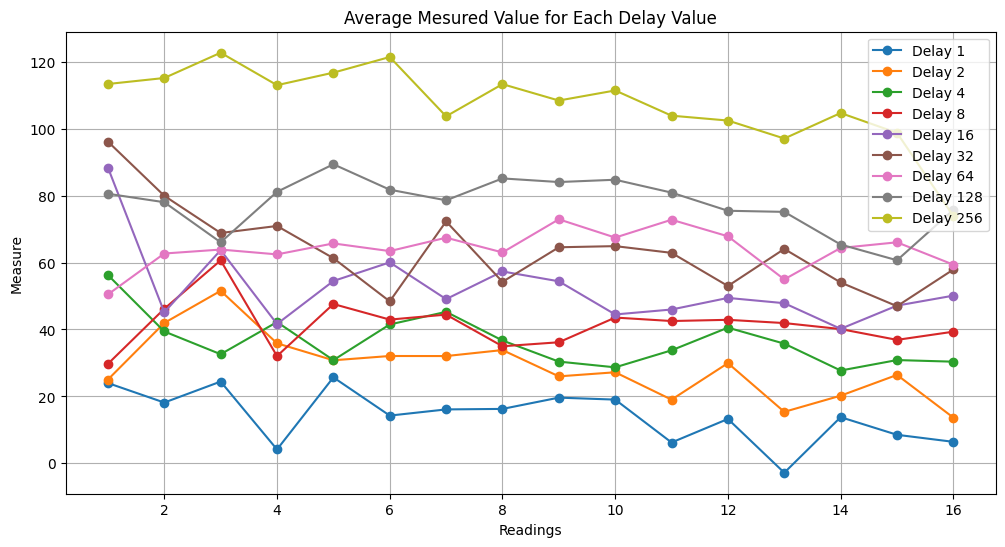

In [27]:
# Drop rows with NaN values in Delay or Readings
# data_2 = data_2.dropna(subset=['Delay', 'Readings', 'Time_diff'])

# Group by Delay and Readings, then calculate the mean of Time_diff
data_2_avg_M = data_2.groupby(['Delay', 'Readings']).agg({'Measure': 'mean'}).reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
for delay in data_2_avg_M['Delay'].unique():
    subset = data_2_avg_M[data_2_avg_M['Delay'] == delay]
    plt.plot(subset['Readings'], subset['Measure'], label=f'Delay {delay}', marker='o')

plt.xlabel('Readings')
plt.ylabel('Measure')
plt.title('Average Mesured Value for Each Delay Value')
plt.legend()
plt.grid(True)
plt.show()